In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading files
train = pd.read_csv('Trainfile.csv')
test = pd.read_csv('Testfile.csv')

In [3]:
train.head()

,Idx,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,45,RL,59.0,7227,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,105500
1,2,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
2,3,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
3,4,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
4,5,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [4]:
train.describe()

,Idx,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1138.000000,1138.000000,938.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1132.000000,1138.000000,...,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,569.500000,57.618629,70.484009,10273.514060,6.111599,5.597540,1970.995606,1984.790861,102.795053,440.527241,...,90.373462,47.494728,23.067663,2.947276,14.570299,2.434974,40.179262,6.332162,2007.847100,179328.707381
std,328.656609,42.519037,24.983885,7742.762753,1.374100,1.112681,30.388180,20.618711,179.089584,452.563788,...,121.890193,67.077467,62.790978,25.120656,53.994274,36.868419,496.795058,2.722983,1.326741,76642.678880
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,285.250000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,569.500000,50.000000,70.000000,9496.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,384.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162450.000000
75%,853.750000,70.000000,80.000000,11596.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,706.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210750.000000
max,1138.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,523.000000,552.000000,320.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [5]:
pd.set_option('display.max_rows',None)

In [6]:
train.isnull().sum()

Idx                 0
MSSubClass          0
MSZoning            0
LotFrontage       200
LotArea             0
Street              0
Alley            1072
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
MasVnrArea          6
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#dropping features with maximum values as null
train = train.drop(['Idx','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
test = test.drop(['Idx','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [8]:
#label encoding
cate_feat = []
for i in range(len(train.columns)):
    if train[train.columns[i]].dtypes == object:
        cate_feat.append(train.columns[i])
        train.iloc[:,i] , uniques = pd.factorize(train.iloc[:,i])
        test.iloc[:,i] , uniques = pd.factorize(test.iloc[:,i])
print(cate_feat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [9]:
#checking for variation in categorical features
for i in range(len(train.columns)):
    if train.columns[i] in cate_feat:
        print(train.iloc[:,i].value_counts())

0    906
2    167
1     44
4     12
3      9
Name: MSZoning, dtype: int64
0    1133
1       5
Name: Street, dtype: int64
0    727
1    375
3     30
2      6
Name: LotShape, dtype: int64
1    1015
2      52
0      44
3      27
Name: LandContour, dtype: int64
0    1138
Name: Utilities, dtype: int64
1    828
0    203
2     69
3     35
4      3
Name: LotConfig, dtype: int64
1    1080
0      48
2      10
Name: LandSlope, dtype: int64
0     176
11    119
8      89
9      79
10     65
4      64
6      62
1      60
2      54
7      46
19     42
18     40
15     39
5      32
16     30
3      26
20     22
22     18
17     17
12     15
14     14
23     12
13      8
21      7
24      2
Name: Neighborhood, dtype: int64
2    975
4     66
0     36
8     21
1     17
5     10
7      7
6      4
3      2
Name: Condition1, dtype: int64
0    1128
2       5
4       2
3       2
1       1
Name: Condition2, dtype: int64
0    952
3     83
1     40
2     37
4     26
Name: BldgType, dtype: int64
2    556
1    366

In [10]:
#removing features wd very less variation, if 1000+ entries have same value, then feature is dropped
train = train.drop(['Street','Utilities','LandContour','LandSlope','Condition2','ExterCond','BsmtCond','BsmtFinType2','SaleType','PavedDrive','GarageQual','GarageCond','Functional','CentralAir','Heating'],axis=1)
test = test.drop(['Street','Utilities','LandContour','LandSlope','Condition2','ExterCond','BsmtCond','BsmtFinType2','SaleType','PavedDrive','GarageQual','GarageCond','Functional','CentralAir','Heating'],axis=1)

In [11]:
#filling missing values
for i in range(len(train.columns)):
    train_mean = (train.iloc[:,i].mean())
    test_mean = (test.iloc[:,i].mean())
    train.iloc[:, i] = train.iloc[:, i].fillna(train_mean)
    test.iloc[:, i] = test.iloc[:, i].fillna(test_mean)

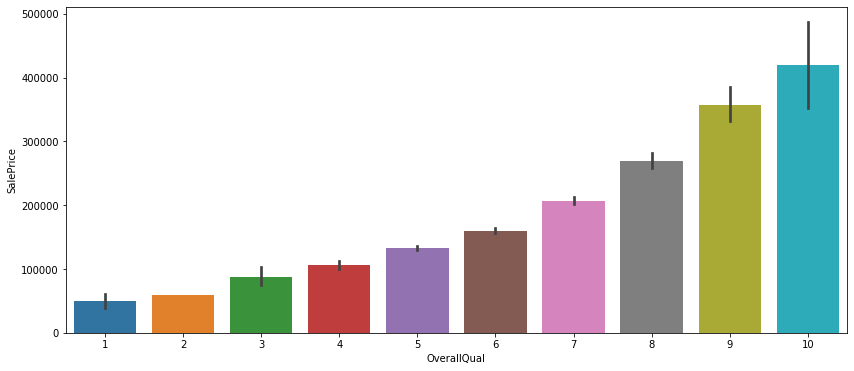

In [12]:
#analysing impact of important features (intuition-based) on the target variable 
data=train.copy()
plt.figure(figsize=(14,6))
sns.barplot(x=data['OverallQual'],y=data['SalePrice'])

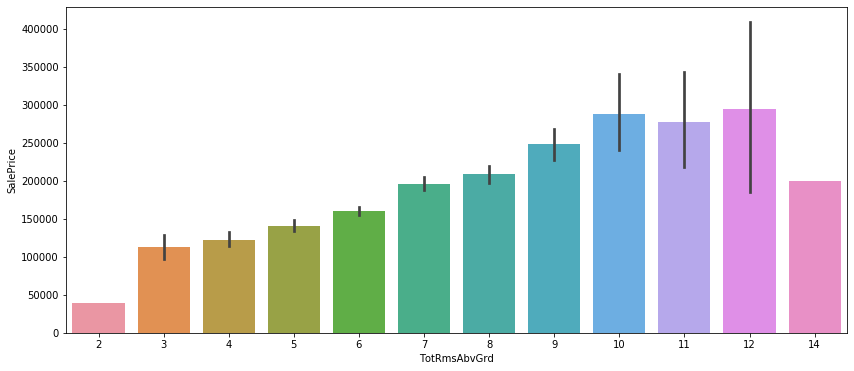

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(x=data['TotRmsAbvGrd'],y=data['SalePrice'])

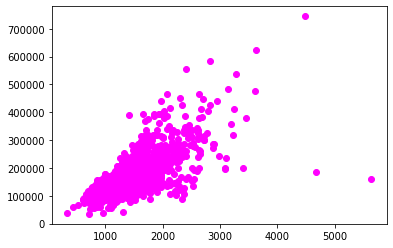

In [14]:
plt.scatter(data['GrLivArea'],data['SalePrice'],color='magenta')

In [15]:
#correlation
corr = train.corr()['SalePrice'][0:-1]
corr.sort_values(axis=0,ascending=False)

OverallQual      0.791583
GrLivArea        0.696450
GarageCars       0.643390
GarageArea       0.622827
TotalBsmtSF      0.583200
1stFlrSF         0.571859
FullBath         0.570665
ExterQual        0.535024
YearBuilt        0.529717
TotRmsAbvGrd     0.523361
YearRemodAdd     0.522126
BsmtQual         0.515484
GarageYrBlt      0.477161
Fireplaces       0.456931
MasVnrArea       0.455288
GarageFinish     0.424662
MasVnrType       0.363299
GarageType       0.350097
2ndFlrSF         0.338577
BsmtFinSF1       0.334695
OpenPorchSF      0.316538
WoodDeckSF       0.309539
HalfBath         0.290770
LotArea          0.284774
BsmtExposure     0.258280
BsmtUnfSF        0.238853
LotShape         0.220161
BsmtFullBath     0.213439
HeatingQC        0.212123
BedroomAbvGr     0.184831
RoofStyle        0.139349
ScreenPorch      0.138973
PoolArea         0.102545
Foundation       0.101714
MoSold           0.095011
RoofMatl         0.078587
3SsnPorch        0.064660
LotConfig        0.043587
SaleConditio

In [16]:
corr2 = corr.to_dict()
feat_to_drop = []
for key,value in corr2.items():
    if (abs(value) < 0.5):
        feat_to_drop.append(key)

In [17]:
train = train.drop(feat_to_drop, axis = 1)
test = test.drop(feat_to_drop, axis = 1)

In [18]:
#normalisation
train = (train-train.mean())/train.std()
test = (test-test.mean())/test.std()

In [19]:
#preparing data
X = train.iloc[:,:-1]
ones=np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = train['SalePrice'].values
y = y.reshape((len(y),1))
print(X.shape)

(1138, 13)


In [20]:
#initialising
theta = np.zeros([1,len(train.columns)])
alpha = .03
iters = 2500

In [21]:
#defining cost function and gradient descent
def Cost(X,y,theta):
    diff = np.power(((X @ theta.T)-y),2)
    return np.sum(diff)/(2 * len(X))

def GradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = Cost(X, y, theta)
    
    return theta,cost

In [22]:
#training the model
weights,cost = GradientDescent(X,y,theta,iters,alpha)
print(weights)

finalCost = Cost(X,y,weights)
print(finalCost)


[[-7.91118781e-16  3.20859289e-01  8.79459520e-02  6.29503783e-02
   7.64970359e-02  6.08875770e-02  7.31290603e-02  6.07907616e-02
   3.07058765e-01 -4.10276550e-02  1.30527812e-02  9.04313195e-02
   5.07266064e-02]]
0.1147918665699897


Text(0.5, 1.0, 'Cost vs Iterations')

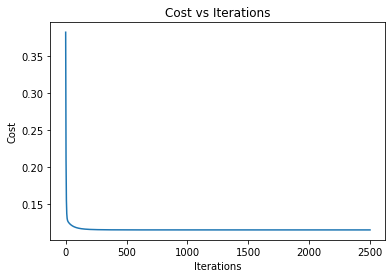

In [23]:
#verifying gradient descent
fig, ax = plt.subplots() 
ax.plot(np.arange(iters), cost)  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Cost vs Iterations')  

In [24]:
#preparing test data
X1 = test.iloc[:, :-1]
y1 = test['SalePrice']
y1 = y1.values.reshape(len(y1), 1)
ones2 = np.ones([X1.shape[0],1])
X1 = np.concatenate((ones2, X1), axis= 1)

In [25]:
y_pred = X1 @ weights.T

In [28]:
#mape and accuracy
def mape (y,y_pr):
    mape = (100/len(y))*sum(abs(y-y_pr)/y)
    return mape
MAPE = mape (y1,y_pred)
print('MAPE = '+ str(MAPE))
print('Accuracy = ' + str(100-MAPE) + '%')

MAPE = [7.13948649]
Accuracy = [92.86051351]%
